In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
N = 6
mnist_acc = np.repeat(np.linspace(80, 99, N)[np.newaxis, :], 2, axis=0)
mnist_acc[0,:] += np.random.rand(N)*2
mnist_acc[1,:] += np.random.rand(N)*6

cluttered_acc = np.repeat(np.linspace(70, 90, N)[np.newaxis, :], 2, axis=0)
cluttered_acc[0,:] += np.random.rand(N)*2
cluttered_acc[1,:] += np.random.rand(N)*6

tc_acc = np.repeat(np.linspace(75, 85, N)[np.newaxis, :], 2, axis=0)
tc_acc[0,:] += np.random.rand(N)*2
tc_acc[1,:] += np.random.rand(N)*6

data = np.stack([mnist_acc, cluttered_acc, tc_acc])
data.shape


(3, 2, 6)

In [15]:
mnist_acc = np.array([
    [0.1402, 0.5853, 0.8498, 0.9461, 0.9821, 0.9895], # ours
    [0.2145, 0.278 , 0.6579, 0.9288, 0.9853, 0.9906], # ram

])

# cluttered_acc = np.array([
#     [0.2278, 0.5896, 0.7851, 0.8788, 0.9177, 0.9331], # ours
#     [0.2763, 0.6261, 0.7949, 0.8923, 0.9262, 0.9357], # ram
# ])

data = np.stack([mnist_acc]) * 100
data.shape

(1, 2, 6)

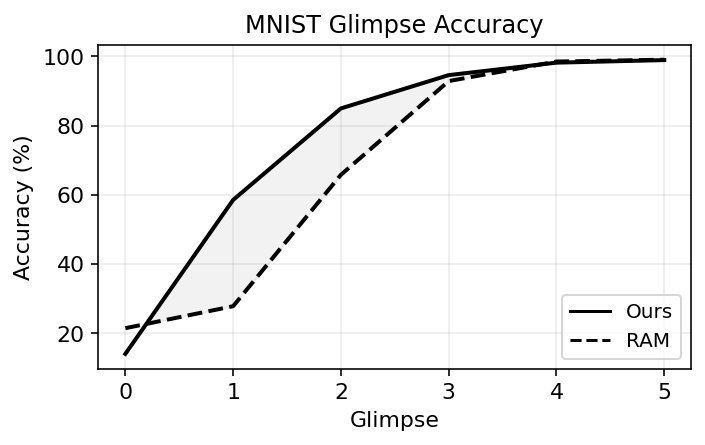

In [81]:
filename = '../plots/misc/glimpse_acc.pdf'

ls = ['-', '--']
labels = ['mnist', 'cluttered', 'cyclones']
colors = ['black', 'blue', 'black']

fontsize = 11

fig, ax = plt.subplots(1,1,figsize=(5,3.2))
for i in range(len(data)):
    for j in range(2):
        ax.plot(data[i,j], linestyle=ls[j], label=(labels[i] if j == 0 else None), 
                color=colors[i], lw=2)

ax.fill_between(range(6), data[0,0], data[0,1], 
                color='gray', alpha=0.1, 
                where=data[0,0] >= data[0,1], interpolate=True)

ax.tick_params(axis='both', which='major', 
               labelsize=fontsize)
ax.grid(alpha=0.25)

# legend1 = plt.legend(loc=0)
dummy_lines = []
for i in range(2):
    dummy_lines.append(ax.plot([],[], c='black', ls=ls[i])[0])
legend2 = plt.legend([dummy_lines[i] for i in [0,1]], ['Ours', 'RAM'], loc=4)
# ax.add_artist(legend1)

ax.set_xlabel('Glimpse', fontsize=fontsize)
ax.set_ylabel('Accuracy (%)', fontsize=fontsize)
# ax.set_title('MNIST Glimpse Accuracy', loc='left', weight='bold')
ax.set_title('MNIST Glimpse Accuracy')
fig.tight_layout()

plt.savefig(filename, dpi=300, bbox_inches='tight')